In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,roc_curve,confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

Using TensorFlow backend.
C:\Users\PranayJoshi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\PranayJoshi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\PranayJoshi\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\PranayJoshi\Anaconda3\lib\site-packages\tensorflow\py

In [2]:
#Uploading data
df=pd.read_excel('Case Study Data scientist Challenge_dataset_Persistent_Non_Persistent (1).xlsx',sheet_name='Dataset')

In [3]:
#Checking fo null values in the data
df.isnull().sum()

Ptid                                                               0
Persistency_Flag                                                   0
Gender                                                             0
Race                                                               0
Ethnicity                                                          0
Region                                                             0
Age_Bucket                                                         0
Ntm_Speciality                                                     0
Ntm_Specialist_Flag                                                0
Ntm_Speciality_Bucket                                              0
Gluco_Record_Prior_Ntm                                             0
Gluco_Record_During_Rx                                             0
Dexa_Freq_During_Rx                                                0
Dexa_During_Rx                                                     0
Frag_Frac_Prior_Ntm               

In [4]:
#Checking for data balance in the target variable
df['Persistency_Flag'].value_counts()

Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64

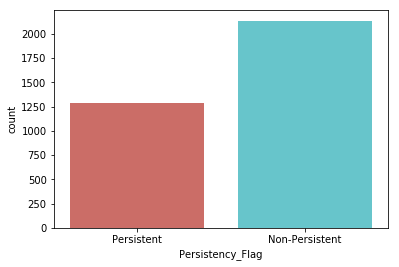

In [5]:
sns.countplot(x='Persistency_Flag',data=df,palette='hls')
plt.show()

In [6]:
a=len(df[df['Persistency_Flag']=='Non-Persistent'])
b=len(df[df['Persistency_Flag']=='Persistent'])
NonPersis=(a/(a+b))
print('Percentage of patient Non-Persistent'+' '+str(NonPersis*100))
Persis=(b/(a+b))
print('Percentage of patient Persistent'+' '+str(Persis*100))

Percentage of patient Non-Persistent 62.353971962616825
Percentage of patient Persistent 37.646028037383175


Above calculations and observations shows that the data is imbalanced for our target variable the number of oberservations for Non-Persistent patient are higher than the number of observations for Persistent patient.

Text(0, 0.5, 'Persistency_Flag')

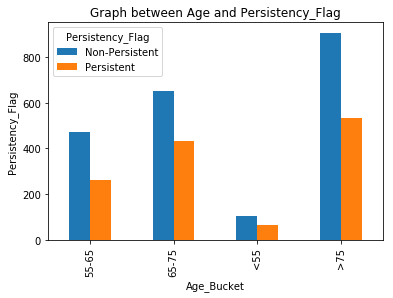

In [7]:
%matplotlib inline
pd.crosstab(df.Age_Bucket,df.Persistency_Flag).plot(kind='bar')
plt.title('Graph between Age and Persistency_Flag')
plt.xlabel('Age_Bucket')
plt.ylabel('Persistency_Flag')

Text(0, 0.5, 'Persistency_Flag')

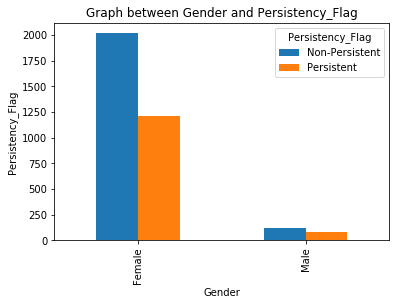

In [8]:
%matplotlib inline
pd.crosstab(df.Gender,df.Persistency_Flag).plot(kind='bar')
plt.title('Graph between Gender and Persistency_Flag')
plt.xlabel('Gender')
plt.ylabel('Persistency_Flag')

Text(0, 0.5, 'Persistency_Flag')

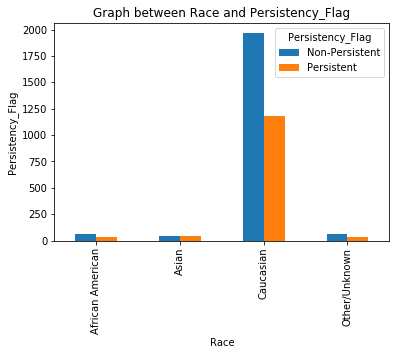

In [9]:
%matplotlib inline
pd.crosstab(df.Race,df.Persistency_Flag).plot(kind='bar')
plt.title('Graph between Race and Persistency_Flag')
plt.xlabel('Race')
plt.ylabel('Persistency_Flag')

Text(0, 0.5, 'Persistency_Flag')

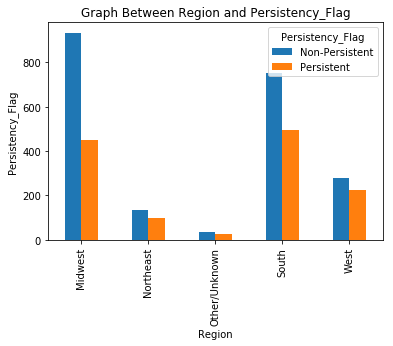

In [10]:
%matplotlib inline
pd.crosstab(df.Region,df.Persistency_Flag).plot(kind='bar')
plt.title('Graph Between Region and Persistency_Flag')
plt.xlabel('Region')
plt.ylabel('Persistency_Flag')

Text(0, 0.5, 'Persistency_Flag')

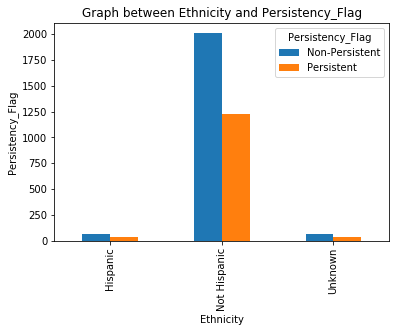

In [11]:
%matplotlib inline
pd.crosstab(df.Ethnicity,df.Persistency_Flag).plot(kind='bar')
plt.title('Graph between Ethnicity and Persistency_Flag')
plt.xlabel('Ethnicity')
plt.ylabel('Persistency_Flag')

Text(0, 0.5, 'Persistency_Flag')

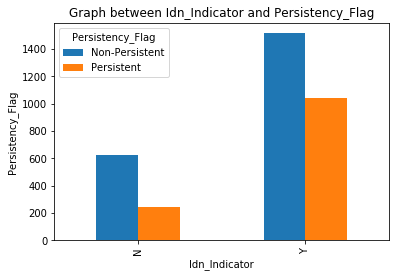

In [12]:
%matplotlib inline
pd.crosstab(df.Idn_Indicator,df.Persistency_Flag).plot(kind='bar')
plt.title('Graph between Idn_Indicator and Persistency_Flag')
plt.xlabel('Idn_Indicator')
plt.ylabel('Persistency_Flag')

Text(0, 0.5, 'Persistency_Flag')

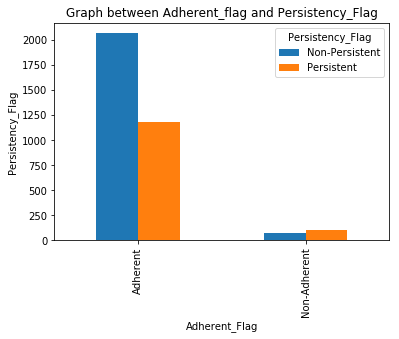

In [13]:
%matplotlib inline
pd.crosstab(df.Adherent_Flag,df.Persistency_Flag).plot(kind='bar')
plt.title('Graph between Adherent_flag and Persistency_Flag')
plt.xlabel('Adherent_Flag')
plt.ylabel('Persistency_Flag')

Text(0, 0.5, 'Persistency_Flag')

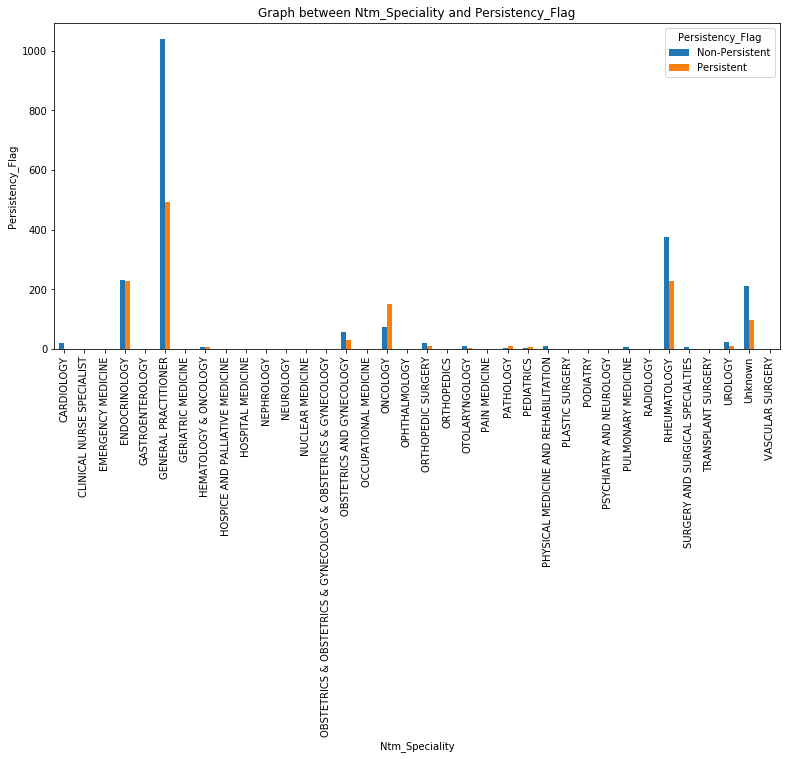

In [14]:
%matplotlib inline
pd.crosstab(df.Ntm_Speciality,df.Persistency_Flag).plot(kind='bar',figsize=(13,6))
plt.title('Graph between Ntm_Speciality and Persistency_Flag')
plt.xlabel('Ntm_Speciality')
plt.ylabel('Persistency_Flag')

Text(0, 0.5, 'Persistency_Flag')

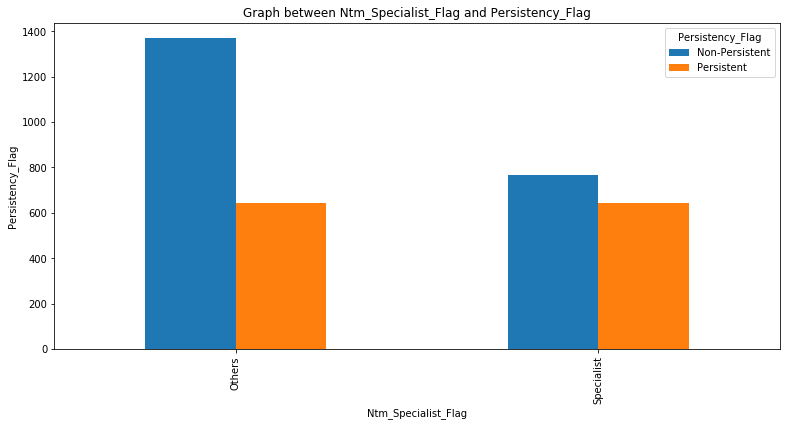

In [15]:
%matplotlib inline
pd.crosstab(df.Ntm_Specialist_Flag,df.Persistency_Flag).plot(kind='bar',figsize=(13,6))
plt.title('Graph between Ntm_Specialist_Flag and Persistency_Flag')
plt.xlabel('Ntm_Specialist_Flag')
plt.ylabel('Persistency_Flag')

Text(0, 0.5, 'Persistency_Flag')

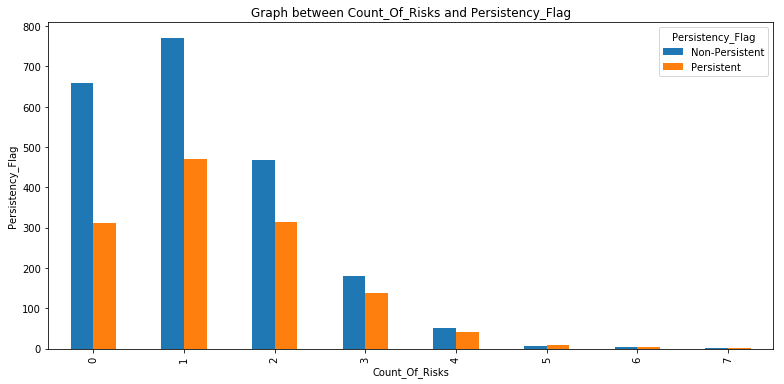

In [16]:
%matplotlib inline
pd.crosstab(df.Count_Of_Risks,df.Persistency_Flag).plot(kind='bar',figsize=(13,6))
plt.title('Graph between Count_Of_Risks and Persistency_Flag')
plt.xlabel('Count_Of_Risks')
plt.ylabel('Persistency_Flag')

Above graphs are between target(Persistency_Flag) and some other features,which helps us to get some information about other features with respect to our target variable. This graph helps us to understand the how persistency of patients varies with their demographics and other information.

In [17]:
#Converting data
df=pd.get_dummies(df, columns=['Ntm_Specialist_Flag',"Adherent_Flag","Persistency_Flag","Gender",'Gluco_Record_Prior_Ntm','Gluco_Record_During_Rx','Dexa_During_Rx','Frag_Frac_Prior_Ntm','Frag_Frac_During_Rx','Risk_Segment_Prior_Ntm','Tscore_Bucket_Prior_Ntm','Idn_Indicator','Injectable_Experience_During_Rx','Comorb_Encounter_For_Screening_For_Malignant_Neoplasms','Comorb_Encounter_For_Immunization','Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx','Comorb_Vitamin_D_Deficiency','Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified','Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx','Comorb_Long_Term_Current_Drug_Therapy','Comorb_Dorsalgia','Comorb_Personal_History_Of_Other_Diseases_And_Conditions','Comorb_Other_Disorders_Of_Bone_Density_And_Structure','Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias','Comorb_Osteoporosis_without_current_pathological_fracture','Comorb_Personal_history_of_malignant_neoplasm','Comorb_Gastro_esophageal_reflux_disease','Concom_Cholesterol_And_Triglyceride_Regulating_Preparations','Concom_Narcotics','Concom_Systemic_Corticosteroids_Plain','Concom_Anti_Depressants_And_Mood_Stabilisers','Concom_Fluoroquinolones','Concom_Cephalosporins','Concom_Macrolides_And_Similar_Types','Concom_Broad_Spectrum_Penicillins','Concom_Anaesthetics_General','Concom_Viral_Vaccines','Risk_Type_1_Insulin_Dependent_Diabetes','Risk_Osteogenesis_Imperfecta','Risk_Rheumatoid_Arthritis','Risk_Untreated_Chronic_Hyperthyroidism','Risk_Untreated_Chronic_Hypogonadism','Risk_Untreated_Early_Menopause','Risk_Patient_Parent_Fractured_Their_Hip','Risk_Smoking_Tobacco','Risk_Chronic_Malnutrition_Or_Malabsorption','Risk_Chronic_Liver_Disease','Risk_Family_History_Of_Osteoporosis','Risk_Low_Calcium_Intake','Risk_Vitamin_D_Insufficiency','Risk_Poor_Health_Frailty','Risk_Excessive_Thinness','Risk_Hysterectomy_Oophorectomy','Risk_Estrogen_Deficiency','Risk_Immobilization','Risk_Recurring_Falls'],drop_first=True)

df=pd.get_dummies(df, columns=['Age_Bucket','Ntm_Speciality_Bucket','Risk_Segment_During_Rx','Change_T_Score','Change_Risk_Segment','Tscore_Bucket_During_Rx','Ethnicity','Race','Region','Ntm_Speciality'])

df=df.drop(['Ptid'],axis=1)

Dimension of our data is increased to a next level, we have 127 features in our data. To bring down the dimensions of our data or to extract the important features out of our data we are using feature extraction technique. 

In [18]:
X=df.loc[:,df.columns!='Persistency_Flag_Persistent']
y=df.loc[:,df.columns=='Persistency_Flag_Persistent']

Lasso regularization:
Here we will do feature selection using Lasso regularization. If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.

In [19]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

C:\Users\PranayJoshi\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best alpha using built-in LassoCV: 0.001321
Best score using built-in LassoCV: 0.447611


In [20]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 60 variables and eliminated the other 66 variables


In [21]:
imp_coef = coef.sort_values()

In [22]:
a=pd.DataFrame(imp_coef)
a=a.rename(columns={0:'score'})
a=a[a.score==0]
a=a.drop('score',axis=1)
a=a.index.tolist()

In [23]:
df.drop(a,inplace=True,axis=1)

We have seen that the data is little imbalanced, tried multiple methods oversmapling,undersmapling but the evaluation does not vary much in both the case.

In [24]:
len(df.columns
   )

61

In [25]:
y = df.Persistency_Flag_Persistent
X = df.drop('Persistency_Flag_Persistent', axis=1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3,random_state=1)

In [27]:
lr = LogisticRegression()
clf=lr.fit(X_train, y_train)
y_pred = clf.predict(X_test)


C:\Users\PranayJoshi\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [28]:
accuracy_score(y_test, y_pred)

0.835603112840467

In [29]:
confusion_matrix(y_test, y_pred)

array([[564,  73],
       [ 96, 295]], dtype=int64)

In [30]:
f1_score(y_test, y_pred)

0.7773386034255599

In [31]:
recall_score(y_test, y_pred)

0.7544757033248082

In [32]:
precision_score(y_test, y_pred)

0.8016304347826086

In [35]:
def generate_auc_roc_curve(clf,X_test):
    y_pred_probab=clf.predict_proba(X_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_probab)
    auc=roc_auc_score(y_test,y_pred_probab)
    plt.plot(fpr,tpr,label="AUC ROC curve with area under the curve= " +str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

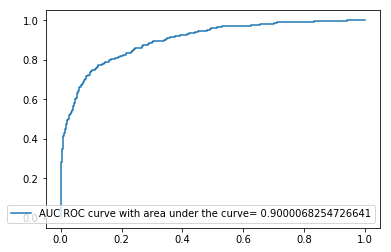

In [36]:
generate_auc_roc_curve(clf,X_test)

In [38]:
df.to_csv('Final_df.csv')